In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [15]:
df = pd.read_csv("/content/cosmetics.csv")

In [16]:
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [17]:
X = df[['Price', 'Rank']]
y = df['Label']

In [18]:
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [6]:
df.isnull().sum()

Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test , y_pred)
conf_matrix = confusion_matrix(y_test , y_pred)
classification_rep = classification_report(y_test, y_pred)

In [12]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 32.20%
Confusion Matrix:
[[44  2  8 10  1  0]
 [ 3  8 21 16  0  1]
 [29  4  4 17  0  1]
 [ 9  1  9 33  0  3]
 [ 6  1 14  3  0  0]
 [ 7  3  5 26  0  6]]
Classification Report:
              precision    recall  f1-score   support

    Cleanser       0.45      0.68      0.54        65
   Eye cream       0.42      0.16      0.24        49
   Face Mask       0.07      0.07      0.07        55
 Moisturizer       0.31      0.60      0.41        55
 Sun protect       0.00      0.00      0.00        24
   Treatment       0.55      0.13      0.21        47

    accuracy                           0.32       295
   macro avg       0.30      0.27      0.24       295
weighted avg       0.33      0.32      0.28       295



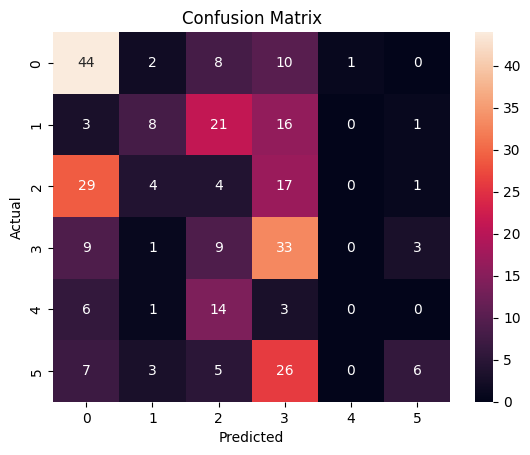

In [13]:
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()